<a href="https://colab.research.google.com/github/trinitajames/Movie-Recommendation-System/blob/main/Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install Required Libraries

In [8]:
!pip install scikit-surprise
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505182 sha256=0d586ecfa8d8272b0b5a21eed67d0f6c75c489a80deb1052d222bf1327bcda69
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


#Import Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

#Load the Dataset

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# Path to the dataset
movies_path = '/content/drive/MyDrive/movie dataset/ml-latest-small/movies.csv'
ratings_path = '/content/drive/MyDrive/movie dataset/ml-latest-small/ratings.csv'

# Load movies and ratings data
movies = pd.read_csv(movies_path)
ratings = pd.read_csv(ratings_path)

# Display the first few rows of the datasets
print("Movies Data:")
print(movies.head())
print("\nRatings Data:")
print(ratings.head())

Movies Data:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Ratings Data:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


# Explore the Dataset

Movies Shape: (9742, 3)
Ratings Shape: (100836, 4)

Missing Values in Movies:
movieId    0
title      0
genres     0
dtype: int64

Missing Values in Ratings:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


<ipython-input-12-dcc98a5b52cc>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=ratings, palette='viridis')


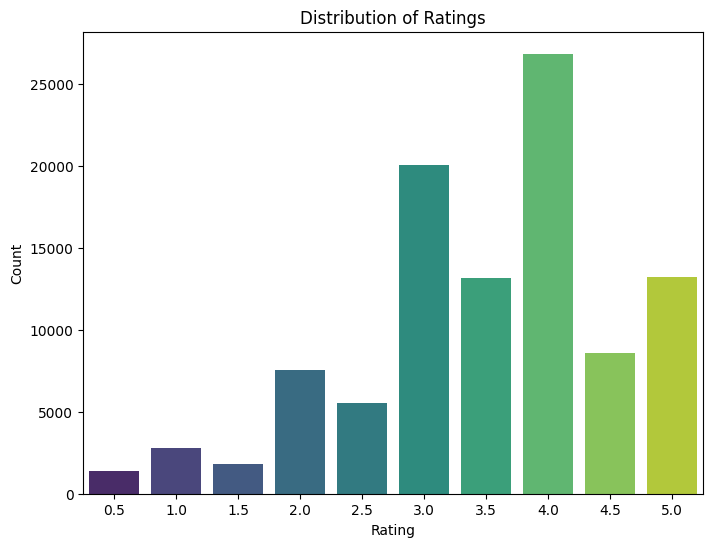

In [12]:
# Check the shape of the datasets
print("Movies Shape:", movies.shape)
print("Ratings Shape:", ratings.shape)

# Check for missing values
print("\nMissing Values in Movies:")
print(movies.isnull().sum())
print("\nMissing Values in Ratings:")
print(ratings.isnull().sum())

# Distribution of ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=ratings, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

#Prepare the Data for Collaborative Filtering

In [13]:
# Define the reader object
reader = Reader(rating_scale=(0.5, 5.0))

# Load the dataset into Surprise format
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

#Build the Recommendation Model

In [14]:
# Initialize the SVD model
model = SVD()

# Train the model on the training set
model.fit(trainset)

# Make predictions on the test set
predictions = model.test(testset)

# Evaluate the model using RMSE (Root Mean Squared Error)
accuracy.rmse(predictions)

RMSE: 0.8802


0.8802385035592935

#Make Recommendations

In [15]:
# Function to get top N recommendations for a user
def get_top_n_recommendations(user_id, n=5):
    # Get a list of all movie IDs
    all_movie_ids = ratings['movieId'].unique()

    # Get the list of movies the user has already rated
    rated_movies = ratings[ratings['userId'] == user_id]['movieId'].unique()

    # Remove movies the user has already rated
    movies_to_predict = np.setdiff1d(all_movie_ids, rated_movies)

    # Predict ratings for the remaining movies
    predictions = []
    for movie_id in movies_to_predict:
        predicted_rating = model.predict(user_id, movie_id).est
        predictions.append((movie_id, predicted_rating))

    # Sort the predictions by predicted rating
    predictions.sort(key=lambda x: x[1], reverse=True)

    # Get the top N recommendations
    top_n = predictions[:n]

    # Get movie titles for the top N recommendations
    top_n_movies = []
    for movie_id, rating in top_n:
        movie_title = movies[movies['movieId'] == movie_id]['title'].values[0]
        top_n_movies.append((movie_title, rating))

    return top_n_movies

# Example: Get top 5 recommendations for user with ID 1
user_id = 1
top_recommendations = get_top_n_recommendations(user_id, n=5)
print(f"Top 5 Recommendations for User {user_id}:")
for movie, rating in top_recommendations:
    print(f"{movie} (Predicted Rating: {rating:.2f})")

Top 5 Recommendations for User 1:
Shawshank Redemption, The (1994) (Predicted Rating: 5.00)
Ghost in the Shell (Kôkaku kidôtai) (1995) (Predicted Rating: 5.00)
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964) (Predicted Rating: 5.00)
Godfather, The (1972) (Predicted Rating: 5.00)
Philadelphia Story, The (1940) (Predicted Rating: 5.00)
